<a href="https://colab.research.google.com/github/dennistay1981/Resources/blob/main/Miscellaneous/EDA%20TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
!pip install pmdarima
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.0 MB/s eta 0:00:00


Import, scale, resample, and plot data

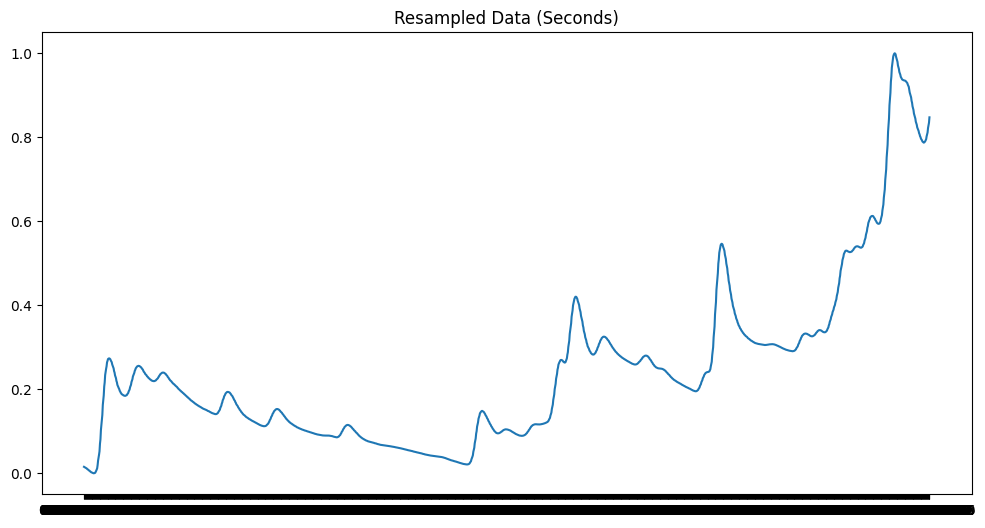

In [2]:
#Import data
data = pd.read_csv('control1.csv', index_col='Time')
#data.index = pd.to_datetime(data.index)


#Scale data
scaler = MinMaxScaler()
data['scaled'] = scaler.fit_transform(data['SCL'].values.reshape(-1, 1))

#Resample data by seconds
#series = data['scaled'].resample('s').mean()
series = data['scaled']

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title('Resampled Data (Seconds)')
plt.show()


Compute and plot (P)ACF

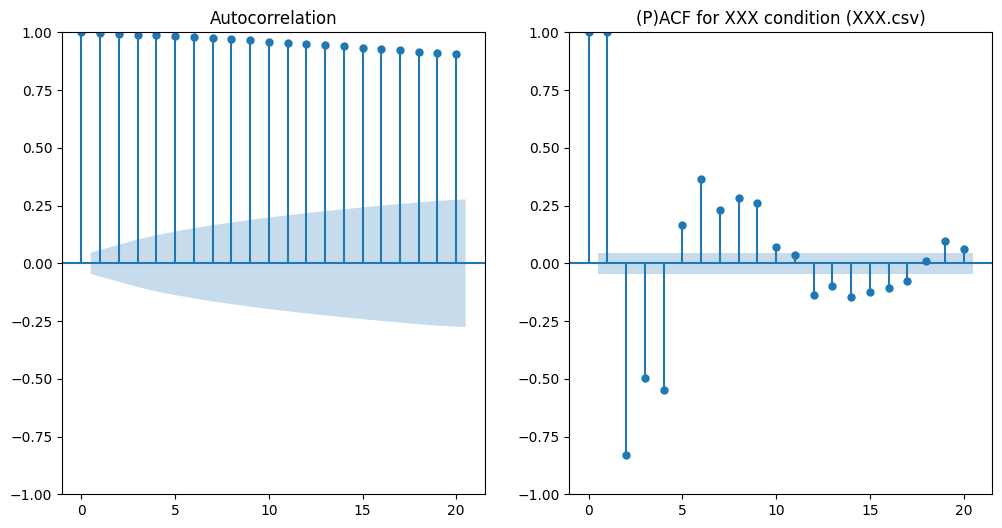

In [3]:
lag_acf = acf(series, nlags=20)
lag_pacf = pacf(series, nlags=20, method='ols')


plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(series, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(series, lags=20, method='ols', ax=plt.gca())
plt.title('(P)ACF for XXX condition (XXX.csv)')
plt.show()

Auto fit best ARIMA model

In [4]:
model = auto_arima(series, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, d=None,seasonal=True,
                      start_P=0, D=None, trace=True,  error_action='ignore', suppress_warnings=True,
                      stepwise=True)


print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14903.398, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16964.058, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15942.026, Time=1.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14879.356, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17464.038, Time=3.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-18089.586, Time=3.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-18043.225, Time=1.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17036.062, Time=3.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-18091.058, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-17464.924, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-18044.706, Time=0.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-17034.467, Time=1.22 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 18.008 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1799
Model:               SARIMAX(3, 1, 0)   Log Likelihood                9049.529
Date:                Fri, 24 Jan 2025   AIC                         -18091.058
Time:                        12:45:28   BIC                         -18069.081
Sample:                    01-24-2025   HQIC                        -18082.945
                         - 01-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1495      0.012     12.413      0.000       0.1

Plot data vs. predictions and evaluate model

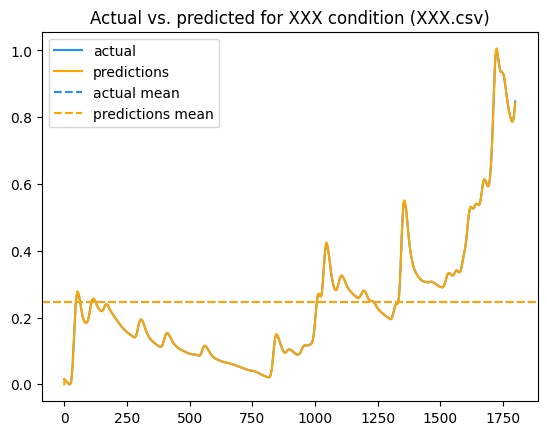

RMSE: nan
MAPE: 872267386.4077985
R2: 0.9999360868778908
AIC: -18091.058281464306


In [5]:
predictions = model.predict_in_sample()
#Create axes
x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.axhline(y=series.mean(), color='dodgerblue', linestyle='--', label='actual mean')
plt.axhline(y=predictions.mean(), color='orange', linestyle='--', label='predictions mean')
plt.legend()
plt.title('Actual vs. predicted for XXX condition (XXX.csv)')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())

Remove first value of series and predictions if the latter is zero, and then replot/re-evaluate

In [ ]:
predictions = predictions[1:]
series = series[1:]


x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.axhline(y=series.mean(), color='dodgerblue', linestyle='--', label='actual mean')
plt.axhline(y=predictions.mean(), color='orange', linestyle='--', label='predictions mean')
plt.legend()
plt.title('Actual vs. predicted for XXX condition (XXX.csv)')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())

Train-test approach to diagnose overfitting

In [ ]:
series_train = series[:int(len(series) * 0.8)]
series_test = series[int(len(series) * 0.8):]


model = auto_arima(series_train, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, d=None,seasonal=True,
                      start_P=0, D=None, trace=True,  error_action='ignore', suppress_warnings=True,
                      stepwise=True)


print(model.summary())

In [ ]:
#Predict on train and test sets
predictions_train = model.predict_in_sample()
predictions_test = model.predict(n_periods=len(series_test))


# Plotting and evaluation for train set
plt.figure(figsize=(12, 6))
plt.plot(series_train.values, label="Actual Train")
plt.plot(predictions_train.values, label="Predicted Train")
plt.legend()
plt.title("Actual vs. Predicted (Train)")
plt.show()

rmse_train = np.sqrt(np.mean((series_train - predictions_train) ** 2))
mape_train = mean_absolute_percentage_error(series_train, predictions_train)
print("Train RMSE:", rmse_train)
print("Train MAPE:", mape_train)


# Plotting and evaluation for test set
plt.scatter(series_test, predictions_test)
plt.title("Actual vs. Predicted (Test)")
plt.show()

#plt.figure(figsize=(12, 6))
#plt.plot(series_test, label="Actual Test")
#plt.plot(predictions_test, label="Predicted Test")
#plt.legend()
#plt.title("Actual vs. Predicted (Test)")
#plt.show()

rmse_test = np.sqrt(np.mean((series_test - predictions_test) ** 2))
mape_test = mean_absolute_percentage_error(series_test, predictions_test)
print("Test RMSE:", rmse_test)
print("Test MAPE:", mape_test)

Compare with SARIMAX (optional)

In [ ]:
import statsmodels.api as sm

model=sm.tsa.SARIMAX(series,order=(1,1,2),seasonal_order = (0,0,0,0), trend='c').fit()   #seasonal_order = (P, D, Q, m)
model.summary()


#Predict
predictions=model.predict(start=0, end=len(series)-1)

#Create axes
x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.legend()
plt.title('Actual vs. predicted for XXX condition (XXX.csv)')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())